In [1]:
import numpy as np
import matplotlib.pyplot as plt # data visualization library

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [2]:
#!pip3 install scikit-learn==1.3.2

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# PCA Faces

In [4]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

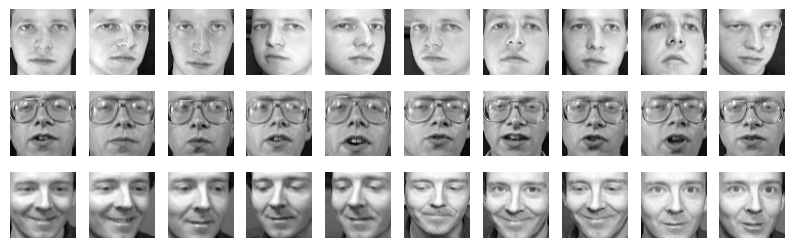

In [5]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [6]:
D = faces.data
D.shape

(400, 4096)

# k-means initialization

In [7]:
!pip3 show numpy

Name: numpy
Version: 1.26.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

If your versions don't match, the following commands (or their anaconda version) could help to get the newest stable release. If you need help with this, please ask the TAs during instruction hours.

In [8]:
!pip3 install numpy --upgrade

In [9]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


The functions generating the datasets are given here:

In [10]:
import sklearn
def generateMoons(epsilon, n):
    moons, labels = sklearn.datasets.make_moons(n_samples=n, noise=epsilon, random_state=7)
    return "moons", moons, labels, 2
def generateBlobs(epsilon, n):
    blobs, labels = sklearn.datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 1, epsilon + 1.5, epsilon + 0.5], random_state=54)
    return "blobs", blobs, labels, 3

Implement the centroid initialization here. Right now, it returns a random initialization. 

In [12]:
def init_centroids_greedy_pp(D,r,l=10):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :param l: (int) number of centroid candidates in each step
        :return: (np-array) 'X' the selected centroids from the dataset
    '''   
    rng =  np.random.default_rng(seed=7) # use this random generator to sample the candidates (sampling according to given probabilities can be done via rng.choice(..))  
    n,d = D.shape

    indexes = rng.integers(low=0, high=n, size=l)
    print(indexes)
    dictionary1 = {}
    for ii in indexes:
        summation = 0
        for j in range(0, n):
            summation += (((D[ii, 0]-D[j, 0])**2)+((D[ii, 1]-D[j, 1])**2))**0.5
        dictionary1[ii] = summation
    i = min(dictionary1)
    X = (D[i]).reshape(-1, 1)
    print(X)
    #print(D[i].reshape(-1, 1))
    s = 2
    while s <= r:
        P = []
        sumdistance2 = 0
        for j in range(0, n):
            sumdistance2 += np.linalg.norm(D[j].T - X)
        for ii in range(0,n):        
            probability = np.linalg.norm(D[ii].T - X)/sumdistance2
            P.append(probability) 
        print(P)

        allindices = list(range(0, n))
        sample = rng.choice(allindices, l, p=P)
        print(sample)
        dictionary2 = {}
        for ii in sample:
            summation = 0
            XDII = np.hstack([X, D[ii].reshape(-1,1)])
            print(XDII)
            for j in allindices:
                summation += np.linalg.norm((D[j].reshape(-1, 1)) - XDII)
            dictionary2[ii] = summation
        iadd = min(dictionary2)
        X = np.hstack([X, D[ii].reshape(-1,1)])
        s = 1+s
    print(X)
    return X


n=500
dataID, D, labels, r = generateBlobs(0.05,n)
c = init_centroids_greedy_pp(D, r)
print(r)

[472 312 342 448 289 387 416 112  27 150]
[[-0.4801768 ]
 [-2.08995347]]
[0.0003977380835885784, 0.0007290580223924475, 0.0006533073007340093, 0.0007567906270933145, 0.0014867913698223248, 0.001581029682818953, 0.0009909253112639369, 0.003964517379631428, 0.0012410153596023657, 0.0005541291919343726, 0.0005868913799536978, 0.003559875569200833, 0.0014173716126050315, 0.0035958825596744477, 0.003853515859355777, 0.003919233330583337, 0.001629433770512054, 0.003849435193130592, 0.0008028961106169331, 0.004151583908365847, 0.003597956716110077, 0.001803343352679692, 0.0004897299307292027, 0.0004880457729373913, 0.0037812076675732033, 0.003815039598237739, 0.0003804851164117597, 0.0004459168712450129, 0.0019042381101125783, 0.00045739451095359635, 0.000415158858818499, 0.003922511501606388, 0.0008762002028292992, 0.0038385086308474693, 0.004108556846181421, 0.0015324386805304153, 0.0016565251772020042, 0.0003725600975721995, 0.0009065641057765548, 0.00045948440503652203, 0.0022539506670868

In [13]:
import scipy
def spectral_clustering(W,r, X_init):
    '''
        :param W: (np-array) nxn similarity/weighted adjacency matrix
        :param r: (int) number of centroids (clusters)
        :param X_init: (function) the centroid initialization function 
        :return: (np-array) 'Y' the computed cluster assignment matrix
    '''  
    np.random.seed(0)
    L = np.diag(np.array(W.sum(0))[0]) - W
    v0 = np.random.rand(min(L.shape))
    Lambda, V = scipy.sparse.linalg.eigsh(L, k=r+1, which="SM", v0=v0)
    A = V[:,1:] #remove the first eigenvector, assuming that the graph is conected
    initial_points = X_init(A,r)
    X, Y = kmeans(A, r, initial_points)

    return Y

This is the $k$-means implementation from the lecture accompanying notebook.

In [14]:
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)

def getY(labels):
    '''
        Compute the cluster assignment matrix Y from the categorically encoded labels
    '''
    Y = np.eye(max(labels)+1)[labels]
    return Y

def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes

def update_assignment(D,X):
    dist = np.sum((np.expand_dims(D,2) - X)**2,1)
    labels = np.argmin(dist,1)
    return getY(labels)

def kmeans(D,r, X_init, epsilon=0.00001, t_max=10000):
    X = X_init.copy()
    Y = update_assignment(D,X)
    rss_old = RSS(D,X,Y) +2*epsilon
    t=0
    #Looping as long as difference of objective function values is larger than epsilon
    while rss_old - RSS(D,X,Y) > epsilon and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    print(t,"iterations")
    return X,Y

## Running k-means on the blobs dataset
We generate the blobs dataset. Run kmeans based on the initialization technique. Finally, we plot the clustering. The initial centroids are marked in red, and the final centroids are marked in blue. You can use this visualization to see if your initialization makes sense. It doesn't work for spectral clustering.

In [15]:
n=500
dataID, D, labels, r = generateBlobs(0.05,n)
print(r)
print(labels)

3
[0 0 0 0 1 1 1 2 1 0 0 2 1 2 2 2 1 2 0 2 2 1 0 0 2 2 0 0 1 0 0 2 0 2 2 1 1
 0 1 0 1 0 0 1 2 1 2 0 1 2 0 1 0 2 1 0 1 1 2 1 0 0 1 0 0 2 1 1 0 2 1 1 1 1
 1 0 1 0 0 2 0 0 2 1 2 0 2 1 0 1 0 0 0 2 1 1 0 2 0 0 0 1 0 0 2 0 0 0 0 1 0
 0 2 2 2 0 1 0 1 2 2 1 2 0 1 0 0 2 1 0 2 2 2 1 2 2 0 0 2 2 0 0 0 0 2 2 0 0
 1 0 0 2 1 1 2 0 0 2 2 2 1 2 2 2 2 1 0 2 2 2 2 1 0 1 1 0 2 2 2 0 0 2 0 0 2
 0 2 1 2 2 2 1 0 2 0 1 2 0 0 0 0 0 2 1 0 2 1 1 0 2 2 0 0 1 2 0 1 0 2 1 0 1
 0 0 1 2 2 2 0 1 1 1 0 0 0 1 2 1 2 2 2 0 1 2 1 2 1 1 2 2 2 2 2 2 0 2 1 0 0
 2 2 1 1 2 0 1 2 1 2 1 1 0 1 1 1 0 1 0 2 2 0 0 1 1 0 1 0 1 0 2 1 0 1 2 1 2
 1 2 2 0 2 1 1 2 0 2 1 0 0 1 2 2 0 0 1 1 2 1 0 2 1 1 1 1 1 1 1 2 0 0 0 2 1
 0 1 2 2 1 0 2 2 0 1 0 2 0 2 1 0 0 1 1 2 0 1 1 2 2 1 0 2 2 2 2 1 2 0 0 0 2
 1 1 1 1 2 1 2 0 2 2 2 1 0 2 2 0 0 2 1 2 1 0 1 1 0 0 0 1 0 2 2 1 1 2 1 0 1
 2 1 1 2 0 1 1 0 0 1 1 2 0 2 0 1 2 0 1 0 2 0 2 2 0 0 0 2 2 1 2 0 2 0 2 1 0
 1 1 0 2 1 1 1 2 1 2 0 0 2 1 1 1 1 0 1 1 2 0 0 1 0 0 2 2 1 1 0 2 2 2 1 1 2
 1 1 1 2 2 1 1 0 1 1 2 

In [16]:
X_init = init_centroids_greedy_pp(D,r)
X,Y = kmeans(D,r, X_init)

[472 312 342 448 289 387 416 112  27 150]
[[-0.4801768 ]
 [-2.08995347]]
[0.0003977380835885784, 0.0007290580223924475, 0.0006533073007340093, 0.0007567906270933145, 0.0014867913698223248, 0.001581029682818953, 0.0009909253112639369, 0.003964517379631428, 0.0012410153596023657, 0.0005541291919343726, 0.0005868913799536978, 0.003559875569200833, 0.0014173716126050315, 0.0035958825596744477, 0.003853515859355777, 0.003919233330583337, 0.001629433770512054, 0.003849435193130592, 0.0008028961106169331, 0.004151583908365847, 0.003597956716110077, 0.001803343352679692, 0.0004897299307292027, 0.0004880457729373913, 0.0037812076675732033, 0.003815039598237739, 0.0003804851164117597, 0.0004459168712450129, 0.0019042381101125783, 0.00045739451095359635, 0.000415158858818499, 0.003922511501606388, 0.0008762002028292992, 0.0038385086308474693, 0.004108556846181421, 0.0015324386805304153, 0.0016565251772020042, 0.0003725600975721995, 0.0009065641057765548, 0.00045948440503652203, 0.0022539506670868

In [17]:
from sklearn.metrics.cluster import normalized_mutual_info_score

#For calculating NMI score and normalizing the number of data points
X, Y = kmeans(D,r, X_init)

#For calculating NMI score and normalizing the number of data points
X, Y = kmeans(D,r, X_init)
n,d = D.shape
innerproduct = Y@(X.T)
meanerror = (np.linalg.norm(D-Y@(X.T))**2/(n*d))
print(meanerror)

'''calculating the NMI score'''
#First create a list with all the labels
listprelabels = []
for i in Y:
    for j in range(0,3):
        if i[j] == 1:
            listprelabels.append(j)
print(listprelabels)

sklearn.metrics.normalized_mutual_info_score(labels, listprelabels, average_method='arithmetic')

6 iterations
6 iterations
1.2345652376488239
[0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 

0.9527380045058217

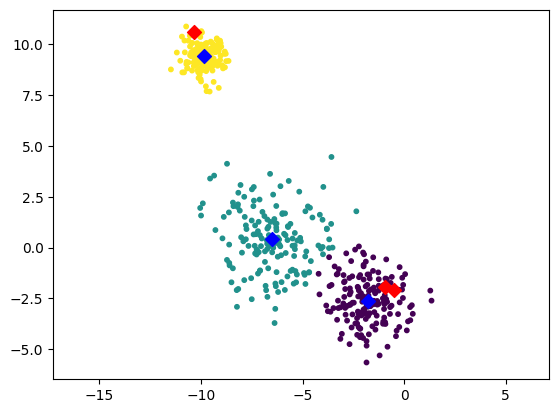

In [18]:
fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
ax.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
ax.scatter(X_init.T[:, 0], X_init.T[:, 1], c='red', s=50, marker = 'D') # initial centroids are in red
ax.scatter(X.T[:, 0], X.T[:, 1], c='blue', s=50, marker = 'D') # computed centroids are in blue
plt.show()

## Running spectral clustering on the two moons dataset
We generate the moons dataset and compute spectral clustering with the implemented initialization technique.

In [19]:
print(n)
dataID, D, labels, r = generateMoons(0.05,n)
print(r)

500
2


[472 312 342 448 289 387 416 112  27 150]
[[ 0.03232773]
 [-0.01275627]]
[0.0015082195103183424, 0.002849088098005048, 0.001431985059111162, 0.0016244662678818883, 0.002102746771804468, 0.0013187148893199169, 0.0041650123819415436, 0.0016865380648888688, 0.002418133479793051, 0.002022331518898595, 0.0014062959298585702, 0.002215103628924268, 0.0017167779457749105, 0.0013575958806999692, 0.005925046848468941, 0.0012226211430260247, 0.004600301749560716, 0.0030543408419432066, 0.00145316029672656, 0.0018268438687423334, 0.0013581643068987593, 0.0018771418483872007, 0.0016963286896055738, 0.001242210709254373, 0.0014355691955976369, 0.0012518419653426674, 0.0012588939692983081, 0.001393293728626136, 0.0012949724303509076, 0.0013499332551481053, 0.0013207002441987454, 0.0014117253799019072, 0.0015100832819224005, 0.0013944224111290496, 0.003802703306068623, 0.001964388967745277, 0.0017055125758690876, 0.0015358006609475052, 0.0014337447595115663, 0.004009983542090124, 0.003194737099327401,

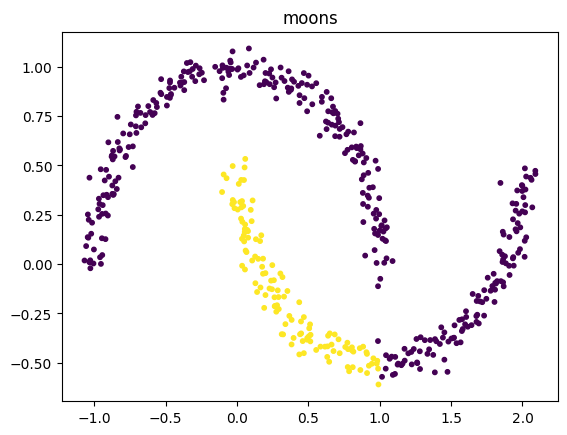

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.

0.34371101848544966

In [61]:

from sklearn.neighbors import radius_neighbors_graph, kneighbors_graph
# Implement here the computation of W as knn graph
W = kneighbors_graph(D, 40, include_self=False)
#print(type(W))
#print(W.toarray())

Y = spectral_clustering(W,r,init_centroids_greedy_pp)

plt.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
plt.title('%s'  % ( dataID) )
plt.show()

#print(Y)
listprelabels2 = (Y[:,1])
print(listprelabels2)
print(labels)
sklearn.metrics.normalized_mutual_info_score(labels, listprelabels2, average_method='arithmetic')

# Your own personal Netflix
## Data Preprocessing

To read the dataset you might need to alter the path to look for it:

In [ ]:
import pandas as pd # pandas is a data manipulation library
# lets explore movies.csv
movies= pd.read_csv('ml-latest-small/movies.csv')
movies.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ml-latest-small/movies.csv'

In [ ]:
# lets explore ratings.CSV
ratings=pd.read_csv('ml-latest-small/ratings.csv',sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


The given ratings are in the range of 0.5 and 5:

In [ ]:
min(ratings["rating"]), max(ratings["rating"])

(0.5, 5.0)

We convert the sparse data representation of movie ratings into a data matrix. The missing values are filled with zeros.

In [ ]:
df_movie_ratings = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  #fill unobserved entries with μ
df_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We consider here only the movies which have been rated by more than 100 users. That are 134 movies. We will not be able to infer a pattern for movies with very few observations anyways, but for this exercise we are mostly interested in the prnciple and do not need a big dataset.

In [ ]:
np.sum(np.sum(df_movie_ratings!=0,0)>100)

134

In [ ]:
keep_movie = np.sum(df_movie_ratings!=0,0)>200
df_D = df_movie_ratings.loc[:,keep_movie]
df_D.head()

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.0,5.0,5.0,4.0,0.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,4.0,3.0,5.0,5.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,1.0,5.0,2.0
5,4.0,0.0,4.0,4.0,3.0,0.0,5.0,3.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


Furthermore, we will throw out all the users which have rated fewer than five movies. It would be hard anyways to make recommendations based on 4 movies.

In [ ]:
np.sum(np.sum(df_D!=0,1)>=5)

398

The resulting dataset has the userID as rows and movieIDs as columns. Hence, userID 1 and 4 addresses the first two rows of this dataset.

In [ ]:
keep_user = np.sum(df_D!=0,1)>5
df_D = df_D.loc[keep_user,:]
df_D.head()

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.0,5.0,5.0,4.0,0.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,4.0,3.0,5.0,5.0,5.0,5.0
4,0.0,2.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,1.0,5.0,2.0
5,4.0,0.0,4.0,4.0,3.0,0.0,5.0,3.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,1.0,5.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0
7,4.5,0.0,4.5,0.0,4.5,5.0,0.0,0.0,5.0,5.0,0.0,2.5,5.0,4.5,4.0,0.0,4.0,0.0


The movie number- title assignments are given as follows:

In [ ]:
movies.loc[movies['movieId'].isin(df_D.columns)]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
97,110,Braveheart (1995),Action|Drama|War
123,150,Apollo 13 (1995),Adventure|Drama|IMAX
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


The resulting data matrix is given as follows:

In [ ]:
D = df_D.to_numpy()
D.shape

(344, 18)

## Optimization
Use the following initialization for your implementation of the optimization scheme.

In [ ]:
def matrix_completion(D,r, t_max=100, λ = 0.1):
    np.random.seed(0)
    X = np.random.normal(size =(d,r))
    Y = np.random.normal(size =(n,r))
    # Implement now the optimization procedure
    return X,Y

# MNIST ANN

In [ ]:
import torch
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
device

'cpu'

## Define the network architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# The embedding architecture returns the 
# output of the penultimate layer
class Embed(nn.Module):
    def __init__(self,embedding_dim=84):
        super(Embed, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(256, 120)
        self.fc2   = nn.Linear(120, embedding_dim)

    def forward(self, x):
        out1 = F.relu(self.conv1(x))
#        print(out1.size())
        out2 = F.max_pool2d(out1, 2)
#        print(out2.size())
        out3 = F.relu(self.conv2(out2))
#        print(out3.size())
        out4 = F.max_pool2d(out3, 2)
#        print(out4.size())
        out5 = out4.view(out4.size(0), -1)
#        print(out5.size())
        out6 = F.relu(self.fc1(out5))
#        print(out6.size())
        out7 = F.relu(self.fc2(out6))
#        print(out7.size())
        return out7     
    
class Net(nn.Module):
    def __init__(self,embedding_dim, classifier):
        super(Net, self).__init__()
        self.embed = Embed(embedding_dim=embedding_dim)
        self.classifier = classifier

    def forward(self, x):
        out = self.embed(x)
        out = self.classifier(out)
        return out

    def conf(self,x):
        out = self.embed(x)
        return F.softmax(self.classifier(out),dim=1)


## Load the data: the first four MNIST classes

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

classes = ('0', '1', '2', '3')
c=4

# Data
print('==> Preparing data..')
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=trans)

# Select only some classes 
idx = train_data.targets < c
train_data.targets = train_data.targets[idx]
train_data.data = train_data.data[idx]
trainloader = DataLoader(train_data, batch_size=128, num_workers=2)


testset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)
# Select only some classes 
idx = testset.targets < c
testset.targets = testset.targets[idx]
testset.data = testset.data[idx]
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

==> Preparing data..


## Implementation of the training and testing

In [ ]:
import time
def train_epoch(net, criterion, optimizer, trainloader, verbose=False):
    train_loss, correct, conf = 0, 0, 0
    start_time=time.time()
    net.train() 
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        # Set the gradient to zero
        optimizer.zero_grad()
        # Do the forward pass
        logits = net(inputs)
        loss = criterion(logits, targets)
        if verbose:
            print("loss:",loss.item())
        # Do the backward pass
        loss.backward()
        # Do a gradient descent step
        optimizer.step()
    
        with torch.no_grad(): #Disable gradient tracking and compute some statistics
            train_loss += loss.item()
            y_probs = F.softmax(logits, dim=1)
            confBatch, predicted = y_probs.max(1)
            correct += predicted.eq(targets).sum().item()
            conf+=confBatch.sum().item()
    execution_time = (time.time() - start_time)
    n=len(trainloader.dataset)
    print('Loss: %.3f | Acc: %.3f%% (%d/%d) | Conf %.2f | time (s): %.2f'% (train_loss/len(trainloader), 100.*correct/n, correct, n, 100*conf/n, execution_time))
    return (100.*correct/n, 100*conf/n)
  
def test_acc(net, criterion, data_loader):
    net.eval()
    test_loss, correct, conf, total = 0,0,0,0
    with torch.no_grad(): # disable gradient tracking
        for batch_idx, (inputs, targets) in enumerate(data_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            logits = net(inputs)
            loss = criterion(logits, targets)

            test_loss += loss.item()
            y_probs = F.softmax(logits, dim=1)
            confBatch, predicted = y_probs.max(1)
            correct += predicted.eq(targets).sum().item()
            conf+=confBatch.sum().item()
    n=len(data_loader.dataset)
    print('Loss: %.3f | Acc: %.3f%% (%d/%d) | Conf %.2f'% (test_loss/max(len(data_loader),1), 100.*correct/n, correct, n, 100*conf/n))
    return (100.*correct/n, 100*conf/n)

## Create the model and perform the optimization for 10 epochs

In [ ]:
d=2
# Model
print('==> Building model..')
classifier = nn.Linear(d, c, bias=True)
print(classifier)
net = Net(embedding_dim=d, classifier=classifier)
net = net.to(device)

criterion = nn.CrossEntropyLoss()

sgd = torch.optim.SGD([{'params': net.parameters()},],
                lr=0.005, momentum=0.9, weight_decay=5e-4)

==> Building model..
Linear(in_features=2, out_features=4, bias=True)


In [ ]:
import os
for epoch in range(20):
    print('\nEpoch: %d' % epoch)
    train_epoch(net, criterion, sgd, trainloader)
    (acc,conf) = test_acc(net,criterion, testloader)

print('Saving..')
state = {'net': net.state_dict(),'acc': acc}
if not os.path.isdir('checkpoint'):
    os.mkdir('checkpoint')
# torch.save(state, './checkpoint/net.t7')
    


                


Epoch: 0


KeyboardInterrupt: 

## Plot the latent space representations

In [ ]:
# Load the saved net
classifier = nn.Linear(d, c,bias=True)
net = Net(embedding_dim=d, classifier=classifier)
checkpoint = torch.load("checkpoint/net.t7",map_location='cpu')
net.load_state_dict(checkpoint['net'])
net.eval()
#print('ACC:\t',checkpoint['acc'])
print(classifier)
#print(net)
print(lambda x: net.classifier(x))
#w = net(inputs)
#print(w.size())
#print(net(inputs))
print(net.load_state_dict(checkpoint['net']))
for i in net.children:
    

Linear(in_features=2, out_features=4, bias=True)
<function <lambda> at 0x00000237C6DE6290>
<All keys matched successfully>


TypeError: 'method' object is not iterable

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def scatter_pictures(inputs, outputs, samples=30):
    zoom = 0.7
        
    for j in range(min(inputs.shape[0],samples)):
        image = inputs[j,:,:,:].squeeze()
        im = OffsetImage(image, cmap="gray",zoom=zoom)
        ab = AnnotationBbox(im, (outputs[j,0], outputs[j,1]), xycoords='data', frameon=False, alpha=0.5)
        ax.add_artist(ab)

In [ ]:
import matplotlib.pyplot as plt
def plot_conf(conf, show_class_assignment=False, x_max=20, y_max=20, x_min=-1, y_min=-1):
    x = np.arange(x_min, x_max, 0.05)
    y = np.arange(y_min, y_max, 0.05)

    xx, yy = np.meshgrid(x, y)
    X = np.array([xx,yy]).reshape(2,x.shape[0]*y.shape[0]).T
    Z = conf(torch.from_numpy(X).float()).t()
    Z = Z.reshape(-1,y.shape[0],x.shape[0]).cpu().detach().numpy()
    if show_class_assignment:
        h = plt.contourf(x,y,Z.argmax(axis=0),cmap='magma')
    else:
        h = plt.contourf(x,y,Z.max(axis=0),cmap='magma')
        plt.clim(0, 1)
        cb = plt.colorbar()
        cb.set_label('Confidence')
    plt.axis('scaled')

In [ ]:
inputs, targets = next(iter(testloader)) #load a batch
outputs = net.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: (net.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (982040342.py, line 4)

## Plot Representations of out-of-distribution data

In [ ]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
c=10

# Data
print('==> Preparing data..')
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=trans)
trainloader_fashion = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)


testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=trans)
testloader_fashion = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, num_workers=2)

==> Preparing data..


100%|██████████| 26421880/26421880 [00:01<00:00, 15340582.66it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 14786775.27it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 474898609.87it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 2580339.03it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



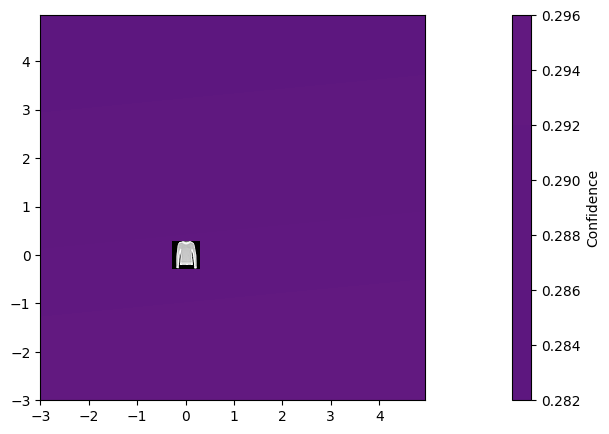

In [ ]:
inputs, targets = next(iter(testloader_fashion))
outputs = net.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: torch.softmax(net.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)